# Assignment 8

#### Problem 2

(This solution follows the notebook "rootfinding.ipynb")

In this problem, we will compare the simple root-finding algorithm and the bisection root-finding algorithm. Both algorithms can be found in rootfinding.py. The simple root-finding algorithm just checks the x values step by step by step until the root is reached, so it is quite straightforward. The bisection root-finding algorithm is essentially a trial and error approach: it first tries a value of x in the middle of its range, if the function value returned is smaller than zero, then it knows the root must be in the larger half of the x range, so it will try another x value in the middle of the larger half, maybe this time the function value returned is bigger than zero, then it will do another bisection and search in the lower half, and so forth, it gradually closes in on the root by bisecting the x range.


The functions we need to solve are:

$y(x) = \tan(x)$.

and 

$y(x) = \tanh(x)$.

Plots are shown below. The root is at $x=0$ for both functions


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from rootfinding import *

We draw the functions close to their roots. 

In [2]:
# I chose this range because at pi/2, the tangent function will have a discountinuity
# The function will firt blow to positive infinity then jump to negative infinity
x1 = -np.pi/2
x2 = np.pi/2


In [3]:
def f(x) :
    return np.tan(x)

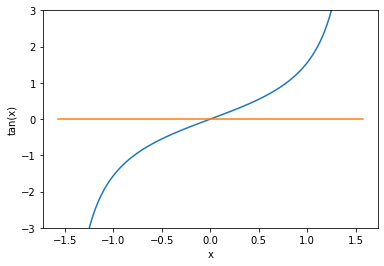

In [9]:
xvals = np.linspace(x1, x2, 1000)
yvals = f(xvals)
zero = xvals*0
plt.plot(xvals, yvals)
plt.plot(xvals, zero)
plt.xlabel("x")
plt.ylabel("tan(x)")
plt.ylim([-3, 3])
plt.show()

Now let's find the root using the simple algorithm.

In [5]:
print(" Algorithms for root of tan(x)")
print(" ------------------------------------------------")

print(" 1. Simple search")
xmid = x1 * 0.5
dx = 0.01
acc = 1e-5
label1 = 'simple'
# The inputs are (function, initial trial, step size, accuracy, maximum steps, output true or false)
answer1, iterations1 = root_simple(f, xmid, dx, acc, 1000, True)

print(" 2. Bisection search")
acc = 1e-5
label2 = 'bisection'
# The inputs are (function, lower limit, upper limit, accuracy, maximum steps, output true or false)
answer2, iterations2 = root_bisection(f, x1, x2, acc, 1000, True)


 Algorithms for root of tan(x)
 ------------------------------------------------
 1. Simple search

 ROOT FINDING using Simple Search with Step Halving
 Requested accuracy = 1e-05
 Step     Guess For Root          Step Size           Function Value
 ----  --------------------  --------------------  --------------------
    0  -0.7853981633974483   0.01                  -0.9999999999999999 
    1  -0.7753981633974483   0.01                  -0.9801973662453539 
    2  -0.7653981633974483   0.01                  -0.9607791866850661 
    3  -0.7553981633974483   0.01                  -0.9417306001272806 
    4  -0.7453981633974482   0.01                  -0.9230374508924628 
    5  -0.7353981633974482   0.01                  -0.9046862463150047 
    6  -0.7253981633974482   0.01                  -0.8866641172535611 
    7  -0.7153981633974482   0.01                  -0.8689587813636879 
    8  -0.7053981633974482   0.01                  -0.8515585089091238 
    9  -0.6953981633974482   0.

Here I purposely misled the simple algorithm a bit, by letting it start at $-\pi/4$. It therefore has to go all the way from there to 0. It took 91 steps. The bisection algorithm, on the other hand, only took 1 step! Because it's initial trial is always right in the middle of the x range, which is 0 in this case, and incidentally that is also the root. 

if we change the range a little, let's see what happens to the bisection algorithm.

In [7]:
print(" 3. Bisection search")
acc = 1e-5
label3 = 'bisection'
# The inputs are (function, lower limit, upper limit, accuracy, maximum steps, output true or false)
answer3, iterations2 = root_bisection(f, x1, np.pi/4, acc, 1000, True)

 3. Bisection search

 ROOT FINDING using Bisection Search
 Requested accuracy = 1e-05
 Step     Guess For Root          Step Size           Function Value
 ----  --------------------  --------------------  --------------------
    0  -0.39269908169872414  2.356194490192345     -0.41421356237309503
    1  0.19634954084936207   1.1780972450961724    0.198912367379658   
    2  -0.09817477042468103  0.5890486225480862    -0.09849140335716425
    3  0.04908738521234052   0.2945243112740431    0.049126849769467254
    4  -0.02454369260617026  0.14726215563702155   -0.024548622108925444
    5  0.01227184630308513   0.07363107781851078   0.012272462379566276
    6  -0.006135923151542565  0.03681553890925539   -0.006136000157623402
    7  0.0030679615757712823  0.018407769454627694  0.003067971201422665
    8  -0.0015339807878856412  0.009203884727313847  -0.0015339819910886664
    9  0.0007669903939428206  0.0046019423636569235  0.0007669905443430926
   10  -0.0003834951969714103  0.00230097

Here, the x range is [-pi/2, pi/4], so it had to go back and forth 18 times to get close to the root which is 0. Of course, the computer would not know the root is exactly 0, it just gives us a really small number close to 0, and says "hey I reached the level of accuracy you required of me!". 

The bisection method is more accurate than the simple method in this case. The efficiency really depends on the situation. If I had set the initial guess close to the root for the simple method, it could take fewer steps to reach it. But in generally, I would say that the bisection method is a more efficient method.

---

Next we try to find the root to:

$y(x) = \tanh(x)$.

First we plot it.

In [8]:
def f2(x) :
    return np.tanh(x)

In [16]:
# Here I defined a new range for x, to make our graph look nicer
x1 = -10
x2 = 10

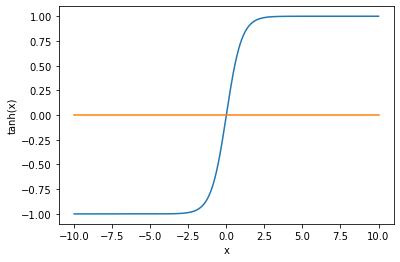

In [17]:
xvals = np.linspace(x1, x2, 1000)
yvals = f2(xvals)
zero = xvals*0
plt.plot(xvals, yvals)
plt.plot(xvals, zero)
plt.xlabel("x")
plt.ylabel("tanh(x)")

# The range for tanh(x) is from -1 to +1
# So we set up like this to make our graph look nicer
plt.ylim([-1.1, 1.1])
plt.show()

Next we try to find the root using the simple method and the bisection method.

In [23]:
print(" Algorithms for root of tanh(x)")
print(" ------------------------------------------------")

print(" 1. Simple search")
xmid = -0.1
dx = 0.01
acc = 1e-5
label4 = 'simple'
# The inputs are (function, initial trial, step size, accuracy, maximum steps, output true or false)
answer4, iterations1 = root_simple(f2, xmid, dx, acc, 1000, True)

print(" 2. Bisection search")
acc = 1e-5
label5 = 'bisection'
# The inputs are (function, lower limit, upper limit, accuracy, maximum steps, output true or false)
answer5, iterations2 = root_bisection(f2, x1, 5, acc, 1000, True)

 Algorithms for root of tanh(x)
 ------------------------------------------------
 1. Simple search

 ROOT FINDING using Simple Search with Step Halving
 Requested accuracy = 1e-05
 Step     Guess For Root          Step Size           Function Value
 ----  --------------------  --------------------  --------------------
    0  -0.1                  0.01                  -0.09966799462495582
    1  -0.09000000000000001  0.01                  -0.08975778474716012
    2  -0.08000000000000002  0.01                  -0.07982976911113138
    3  -0.07000000000000002  0.01                  -0.06988589031642901
    4  -0.06000000000000002  0.01                  -0.059928103529143524
    5  -0.05000000000000002  0.01                  -0.04995837495787999
    6  -0.040000000000000015  0.01                  -0.03997868031116359
    7  -0.030000000000000013  0.01                  -0.02999100323882016
    8  -0.02000000000000001  0.01                  -0.01999733375993094
    9  -0.01000000000000001

Here just for fun, I gave the simple method an initial guess really close to the root, and it happily finishes its job in 20 steps. And for the bisection method, again I did not put the root right in the middle of the range, so it had to take 21 steps to close in on the root. The simple search is also more accurate in this case! So I guess the simple search is good for situations where we roughly know where the root is.